### 1) Importing Libraries

here we are importing needed libraries

In [1]:
#nm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\myAnaconda\envs\epsilon\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\myAnaconda\envs\epsilon\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### 2) Data Description and Reading Data

## Data Description
The dataset used in this analysis, Churn_Modelling.csv, contains information about 10,000 bank customers. The key attributes include demographic information, financial behavior, and engagement indicators. Here are the main columns:

| Feature | Description |
|---------|:-----------|
|CustomerId| Unique identifier for each customer|
|Surname| name of the *customer*|
|CreditScore| Credit score of the customer|
|Geography| Customer’s country of residence|
|Gender| Customer’s gender|
|Age| Customer’s age|
|Tenure| Number of years the customer has been with the bank|
|Balance| Account balance of the customer|
|NumOfProducts| Number of products used by the customer|
|HasCrCard| Whether the customer has a credit card (1: Yes, 0: No)|
|IsActiveMember| Whether the customer is an active member (1: Yes, 0: No)|
|EstimatedSalary| Estimated annual salary of the customer|
|Exited| Target variable indicating if the customer churned (1: Yes, 0: No)|


In [2]:
df = pd.read_csv('class_customer_churn.csv')
df.shape

(10000, 14)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 3) Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Missing Values
missing_values = df.isnull().sum()
print("Missing Values")
print(missing_values)


Missing Values
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [6]:
# Check Duplicates
duplicates_count = df.duplicated().sum()
print("Number of Duplicate Rows Before Cleaning")
print(duplicates_count)

Number of Duplicate Rows Before Cleaning
0


In [7]:
# Detect and Delete outilers
numeric_columns = ['Balance', 'Age', 'Tenure', 'CreditScore', 'EstimatedSalary']

for column in numeric_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [8]:
df.shape

(9627, 14)

### 4) EDA

In [11]:
# Customers with Zero Balance
zero_balance_customers = df[df['Balance'] == 0].shape[0]
print("Number of Customers with Zero Balance ")
print(zero_balance_customers)

Number of Customers with Zero Balance 
3479


In [12]:
# Average Credit Score by Geography
avg_credit_score_geo = df.groupby('Geography')['CreditScore'].mean()
print("Average Credit Score by Geography ")
print(round(avg_credit_score_geo))

Average Credit Score by Geography 
Geography
France     650.0
Germany    652.0
Spain      652.0
Name: CreditScore, dtype: float64


In [13]:
# Percentage of Active Members
active_members_percentage = (df['IsActiveMember'].sum() / df.shape[0]) * 100
print("Percentage of Active Members ")
print(active_members_percentage)

Percentage of Active Members 
50.35836709255219


In [14]:
# Gender Distribution
gender_distribution = df['Gender'].value_counts()
print("Gender Distribution")
print(gender_distribution)

Gender Distribution
Gender
Male      5259
Female    4368
Name: count, dtype: int64


In [17]:
# Most Common Geography for Churned Customers
most_common_geo_churn = df[df['Exited'] == 1]['Geography'].value_counts().idxmax()
print("Most Common Geography for Churned Customers")
print(most_common_geo_churn)

Most Common Geography for Churned Customers
Germany


In [18]:
# Correlation Between CreditScore and Balance
correlation_credit_balance = df['CreditScore'].corr(df['Balance'])
print("Correlation Between CreditScore and Balance")
print(correlation_credit_balance)

Correlation Between CreditScore and Balance
0.007582056866037932


In [19]:
# Average Salary of Customers Who Churned
avg_salary_churned = df[df['Exited'] == 1]['EstimatedSalary'].mean()
print(" Average Salary of Customers Who Churned ")
print(round(avg_salary_churned))

 Average Salary of Customers Who Churned 
101195


### 5) Feature Engineering & Data Preprocessing

In [21]:
df.drop(['RowNumber','CustomerId', 'Surname'], axis=1 , inplace= True)

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
df['Geography_encoded'] = le.fit_transform(df['Geography'])

In [24]:
df[['Geography','Geography_encoded']].drop_duplicates()

,Geography,Geography_encoded
0,France,0
1,Spain,2
15,Germany,1


In [25]:
df['Gender_encoded'] = le.fit_transform(df['Gender'])

In [26]:
df[['Gender','Gender_encoded']].drop_duplicates()

,Gender,Gender_encoded
0,Female,0
5,Male,1


In [27]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded,Gender_encoded
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,1


In [28]:
X = df.drop(['Geography','Gender','Exited'],axis=1)
y = df['Exited']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [32]:
import joblib

In [33]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

### 6)  Building the Model

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [35]:
lr = LogisticRegression()
rf = RandomForestClassifier()
svm = SVC()

In [36]:
# Logistic Regression
param1 = {
    'classifier': [lr],
    'classifier__penalty': ['l2'],  # Regularization type
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__solver': ['lbfgs', 'liblinear']  # Optimization algorithm
}

# Support Vector 
param2 = {
    'classifier': [svm],
    'classifier__C': [0.1, 1, 10, 100],  # Regularization strength
    'classifier__kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'classifier__gamma': ['scale', 'auto']  # Kernel coefficient
}

# Random Forest
param3 = {
    'classifier': [rf],
    'classifier__n_estimators': [50, 100, 200, 500],  # Number of trees
    'classifier__max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'classifier__min_samples_split': [2, 5, 10],  # Minimum samples to split
    'classifier__min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
}

In [37]:
pipeline = Pipeline([('classifier', lr)])
params = [param1, param2, param3]

In [38]:
gs = GridSearchCV(pipeline ,params,cv=3, scoring='accuracy')

In [39]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier', LogisticRegression())]),
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__C': [0.01, 0.1, 1, 10, 100],
                          'classifier__penalty': ['l2'],
                          'classifier__solver': ['lbfgs', 'liblinear']},
                         {'classifier': [SVC()],
                          'classifier__C': [0.1, 1, 10, 100],
                          'classifier__gamma': ['scale', 'auto'],
                          'classifier__kernel': ['linear', 'rbf', 'poly']},
                         {'classifier': [RandomForestClassifier(min_samples_split=10,
                                                                n_estimators=200)],
                          'classifier__max_depth': [None, 10, 20, 30],
                          'classifier__min_samples_leaf': [1, 2, 4],
                          'classifier__min_samples_split': [2, 5, 10],
      

In [42]:
print("Best Parameters:", gs.best_params_)

Best Parameters: {'classifier': RandomForestClassifier(min_samples_split=10, n_estimators=200), 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}


In [43]:
print("Best Accuracy:", gs.best_score_)

Best Accuracy: 0.8640436306973122


In [44]:
y_pred = gs.best_estimator_.predict(X_test)

In [45]:
conf_matrix = confusion_matrix(y_test, y_pred)


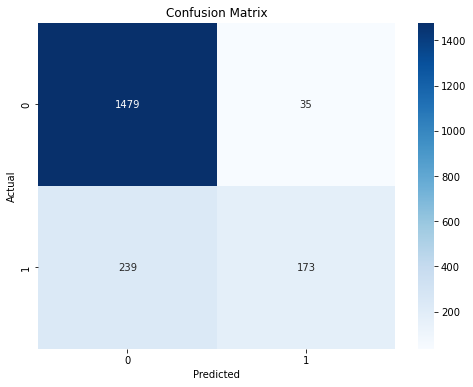

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1514
           1       0.83      0.42      0.56       412

    accuracy                           0.86      1926
   macro avg       0.85      0.70      0.74      1926
weighted avg       0.85      0.86      0.84      1926



In [49]:
joblib.dump(gs.best_estimator_,'model.pkl')

['model.pkl']

In [50]:
my_model = joblib.load('model.pkl')

### Test

In [54]:
input_data = np.array([[619,25,1,1222,1,1,1,20000,0,0]])

In [55]:
input_data_scaled = scaler.transform(input_data)

In [56]:
pred = my_model.predict(input_data_scaled)
pred

array([0], dtype=int64)